# Julia 機器學習：Clustering 分群模型

## 作業 028：資料分群

從提供的檔案中讀取資料，利用分群模型將資料分群後並將資料視覺化。資料中有 15 群，並利用 k-means 去對資料做分群。資料取自 http://cs.uef.fi/sipu/datasets/

In [1]:
using Clustering, CSV, DataFrames

┌ Info: Precompiling Clustering [aaaa29a8-35af-508c-8bc3-b662a17a0fe5]
└ @ Base loading.jl:1273
┌ Info: Precompiling CSV [336ed68f-0bac-5ca0-87d4-7b16caf5d00b]
└ @ Base loading.jl:1273


## 讀取資料

In [2]:
data = CSV.read("s1-set.csv")

5000×2 DataFrame
│ Row  │ x      │ y      │
│      │ Int64  │ Int64  │
├──────┼────────┼────────┤
│ 1    │ 664159 │ 550946 │
│ 2    │ 665845 │ 557965 │
│ 3    │ 597173 │ 575538 │
│ 4    │ 618600 │ 551446 │
│ 5    │ 635690 │ 608046 │
│ 6    │ 588100 │ 557588 │
│ 7    │ 582015 │ 546191 │
│ 8    │ 604678 │ 574577 │
│ 9    │ 572029 │ 518313 │
│ 10   │ 604737 │ 574591 │
⋮
│ 4990 │ 681053 │ 892766 │
│ 4991 │ 683321 │ 873932 │
│ 4992 │ 701017 │ 931252 │
│ 4993 │ 645677 │ 814395 │
│ 4994 │ 677362 │ 853471 │
│ 4995 │ 659046 │ 930099 │
│ 4996 │ 665426 │ 853940 │
│ 4997 │ 691827 │ 863963 │
│ 4998 │ 650661 │ 861267 │
│ 4999 │ 599647 │ 858702 │
│ 5000 │ 684091 │ 842566 │

In [18]:
# X
X = Matrix(data)'

2×5000 LinearAlgebra.Adjoint{Int64,Array{Int64,2}}:
 664159  665845  597173  618600  635690  …  691827  650661  599647  684091
 550946  557965  575538  551446  608046     863963  861267  858702  842566

In [19]:


# 分群, kmeans
k = 15
result = kmeans(X, k)

KmeansResult{Array{Float64,2},Float64,Int64}([167856.14071856288 320602.55 … 507818.3133903134 663092.8813559322; 347812.7155688623 161521.85 … 175610.41595441595 583432.813559322], [15, 15, 10, 10, 15, 10, 10, 10, 10, 10  …  6, 6, 6, 6, 6, 6, 6, 6, 6, 6], [1.0565296642016602e9, 6.561836845234375e8, 2.2589848668945312e7, 1.0411428752954102e9, 1.3567268533710938e9, 2.4488367381835938e8, 8.135134923078613e8, 1.2325018610449219e8, 3.373721331727051e9, 1.2460015539501953e8  …  3.170869336381836e8, 5.703080429390625e9, 2.8939755273203125e9, 1.430810000102539e8, 4.670803248483398e9, 9.204773872265625e7, 4.957503734042969e8, 3.6058074661035156e8, 4.909100007306152e9, 6.102627435537109e8], [334, 340, 346, 652, 334, 355, 347, 316, 328, 241, 351, 327, 319, 351, 59], [334, 340, 346, 652, 334, 355, 347, 316, 328, 241, 351, 327, 319, 351, 59], 1.417888486676537e13, 26, true)

In [20]:
# 取得分群

data[!, :cluster] = string.(assignments(result))

5000-element Array{String,1}:
 "15"
 "15"
 "10"
 "10"
 "15"
 "10"
 "10"
 "10"
 "10"
 "10"
 "10"
 "10"
 "10"
 ⋮   
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 
 "6" 

In [21]:
# 取得分群中心
result.centers

2×15 Array{Float64,2}:
 1.67856e5  3.20603e5  1.39682e5  …  8.23421e5  5.07818e5  6.63093e5
 3.47813e5  1.61522e5  5.58123e5     7.31145e5  1.7561e5   5.83433e5

┌ Info: Precompiling Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004]
└ @ Base loading.jl:1273
┌ Warning: Module CategoricalArrays with build ID 206140922109000 is missing from the cache.
│ This may mean CategoricalArrays [324d7699-5711-5eae-9e2f-1d82baa6b597] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1011
┌ Info: Skipping precompilation since __precompile__(false). Importing Gadfly [c91e804a-d5a3-530f-b6f0-dfbca275c004].
└ @ Base loading.jl:1028


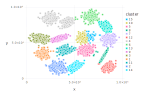

In [23]:
# plot
using Gadfly

plot(data, x="x", y="y", color="cluster", Geom.point)